In [1]:
!pip install ludwig==0.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.4/388.4 kB 1.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 22.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 27.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 24.6 MB/s eta 0:00:0000:0100:01
  Created wheel for ludwig: filename=ludwig-0.4.1-py3-none-any.whl size=489

In [2]:
!pip install transformers

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from ludwig.api import LudwigModel
from ludwig.visualize import learning_curves
import yaml
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
#графики в svg выглядят более четкими


In [4]:
train = pd.read_csv('/kaggle/input/kursk2022jule2/train_dataset_train_predobr.csv')
train

,id,Message text,Текст Сообщения,Тематика,Ответственное лицо,Категория,Subject
0,2246,Help the head of the Lgovsky RES does not resp...,Помогите начальник Льговского рэс не реагирует...,"Нарушения, связанные с содержанием электросети...",Администрация Льговского района,3,Violations related to the maintenance of the p...
1,380,On the facade of the house at st. Uritskogo 22...,<p>По фасаду дома по адресу ул. Урицкого 22 пр...,Аварийные деревья,Администрация города Курска,3,emergency trees
2,2240,Aggressive dogs. On the rainbow there is a flo...,Агресивные собаки. На радуге там стая из подро...,Безнадзорные животные,Администрация города Курска,1,stray animals
3,596,At the intersection of Sosnovskaya and Beregov...,<p>На пересечении &nbsp;улиц Сосновская и Бере...,Нескошенная сорная растительность в местах общ...,Комитет дорожного хозяйства города Курска,3,Uncut weeds in common areas in private sector ...
4,1797,"Hello! Near the house 1 ""A"" on Svetlaya Street...",<p style=`text-align:justify;`><span style=`ba...,Аварийные деревья,Комитет городского хозяйства города Курска,3,emergency trees
...,...,...,...,...,...,...,...
1995,1356,12/22/21 in the evening there was a stink from...,<p>22.12.21 в вечернее время появилась вонь от...,Неприятные запахи,Комитет природных ресурсов Курской области,16,Unpleasant odors
1996,243,Good afternoon! I want to report such a proble...,<p>Добрый день! Хочу сообщить о такой проблеме...,Парковки на дорогах в границах городских округ...,Администрация города Курска,0,Parking on roads within the boundaries of urba...
1997,2350,There are 3 withered trees (2 large birches an...,Состоят 3 засохшие дерева (2 большие берёзы и...,Аварийные деревья,Администрация города Курска,3,Emergency trees
1998,1937,"Please roman Vladimirovich, soon here on a.d. ...","Пожалуйста роман Владимирович, в скором времен...",Нарушение дорожного покрытия (ямы) на дорогах...,Администрация города Курска,0,Violation of the road surface (pits) on roads ...


In [5]:
# добавляем в трейн тематику как сообщение с категорией (удалив дубликаты и все неиспользуемые колонки)
train1=train[['Message text','Категория']]
train2=train[['Subject','Категория']]
train2.columns=['Message text','Категория']
train=pd.concat([train1,train2], axis=0)
train=train.drop_duplicates(subset=['Message text','Категория'], keep='first')
train

,Message text,Категория
0,Help the head of the Lgovsky RES does not resp...,3
1,On the facade of the house at st. Uritskogo 22...,3
2,Aggressive dogs. On the rainbow there is a flo...,1
3,At the intersection of Sosnovskaya and Beregov...,3
4,"Hello! Near the house 1 ""A"" on Svetlaya Street...",3
...,...,...
1975,Violation of the traffic schedule in the imple...,8
1981,Violations related to the payment of travel in...,8
1996,Parking on roads within the boundaries of urba...,0
1997,Emergency trees,3


In [6]:
# тест не меняем, ничего не добавляем
test = pd.read_csv('/kaggle/input/kursk2022jule2/test_dataset_test_predobr.csv')
test

,id,Message text
0,843,"Hello. On Mira Street, outdoor lighting was re..."
1,1422,The street lighting has not been on for two we...
2,2782,The lighting in the courtyard of the house 11a...
3,2704,After mowing weeds on the lawn between the sid...
4,1,I ask you to take action against the driver of...
...,...,...
995,2619,Good afternoon! My family and I are residents ...
996,2518,"On Lazarev 5, Shchigry, a poplar branch will s..."
997,2524,In front of the entrance to the Committee of E...
998,1577,Good day I had a medical exemption from vaccin...


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2125 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Message text  2125 non-null   object
 1   Категория     2125 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 49.8+ KB


Text(0, 0.5, 'Counts')

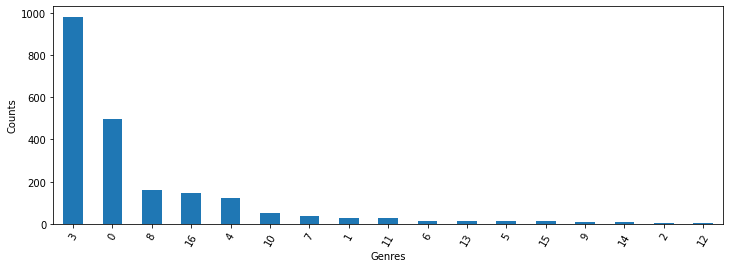

In [8]:
train['Категория'].value_counts().plot(kind='bar',figsize=(12,4),fontsize=10)
plt.xticks(rotation=60)
plt.xlabel("Genres",fontsize=10)
plt.ylabel("Counts",fontsize=10)

In [9]:
train['Категория'].value_counts()

3     983
0     497
8     158
16    146
4     124
10     53
7      37
1      25
11     25
6      15
13     15
5      14
15     11
9       8
14      7
2       5
12      2
Name: Категория, dtype: int64

In [10]:
train['Kategory']=3

In [11]:
# Первое ограничение - по значению 3. Раздел по 2-м вариантам (возможно перевести в бинарное с усилением 1)
train.loc[(train['Категория']!=3),'Kategory']=0
train.loc[(train['Категория']==3),'Kategory']=1

In [12]:
train['Kategory'].value_counts()

0    1142
1     983
Name: Kategory, dtype: int64

In [13]:
config = {
    "input_features": [
        {
            "name": "Message text",
            "type": "text",
            'encoder': 'roberta',
            'trainable': True,        
        },


    ],
    "output_features": [
        {
            "name": 'Kategory',
            "type": "binary",
            "loss":
                {"positive_class_weight": 0.85},
            "dropout": 0.1,
            "activation": 'tanh'# relu, возможно tanh
        }
    ],
        'training': {
        'batch_size': 32,
        'decay': True,     
        'trainable': True,
        'learning_rate': 0.000005,
        'epochs': 15,
        'early_stop': 15,
        'validation_field': 'Kategory',
        'validation_metric': 'accuracy',
        'learning_rate_warmap_epoch': 1,
        
    },
        'preprocessing':{
        'split_probabilities': [0.9, 0.1, 0.0],
        'stratify': 'Kategory'}
}

In [14]:
bert = LudwigModel(config, logging_level=50,)

2022-07-21 12:57:18.222694: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-21 12:57:18.227078: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-21 12:57:18.228145: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [15]:
%%time
print("Training Model...")
train_stats_bert, _, _ = bert.train(
    train,   
    model_name='bert',
    skip_save_processed_input=True,
    random_seed=22)

Training Model...


Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

2022-07-21 12:57:35.635741: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-21 12:57:35.636276: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-21 12:57:35.637496: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-21 12:57:35.638513: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

Downloading:   0%|          | 0.00/627M [00:00<?, ?B/s]

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.
2022-07-21 12:59:06.580270: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)



Received SIGINT, will finish this epoch and then conclude the training
Send another SIGINT to immediately interrupt the process
CPU times: user 11min 16s, sys: 4min 42s, total: 15min 58s
Wall time: 20min 23s


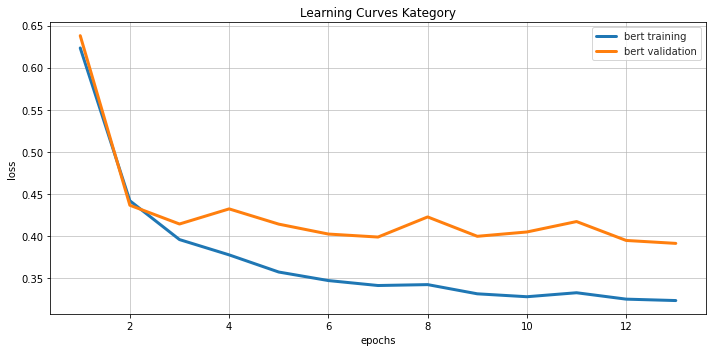

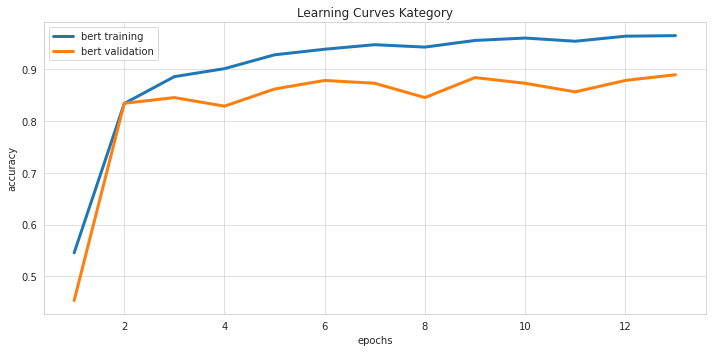

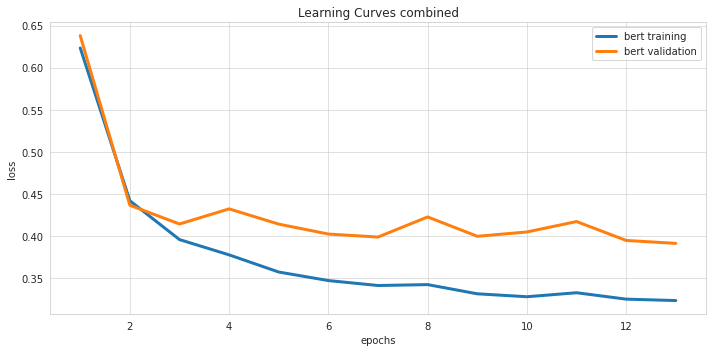

In [16]:
learning_curves(train_stats_bert, output_feature_name='label', model_names='bert')

In [17]:
#bert=LudwigModel.load('results/api_experiment_bert/model')

In [18]:
predictions, _ = bert.predict(test)

In [19]:
predictions['Kategory_predictions'].value_counts()

False    533
True     467
Name: Kategory_predictions, dtype: int64

In [20]:
submission_start = pd.DataFrame({'id':test.id,
                           'Категория':predictions['Kategory_predictions'].values},
                          columns=['id', 'Категория'])
submission_start.to_csv('submission_start.csv', index=False, sep=',', encoding='utf-8')
# возврат из бинарного
submission_start.loc[(submission_start['Категория']==0),'Категория']='Another'
submission_start.loc[(submission_start['Категория']==1),'Категория']=3
submission_start['Категория'].value_counts()

Another    533
3          467
Name: Категория, dtype: int64

In [21]:
# Первое отсечение - убираем из трейна все верно предсказанные 3 

predictions, _ = bert.predict(train)
train['Kategory']=predictions['Kategory_predictions'].values
train1=train.loc[(train['Категория']!=3)|(train['Kategory']!=1)]
train1.to_csv('train1.csv', index=False, sep=',', encoding='utf-8')
train1['Категория'].value_counts()


0     497
8     158
16    146
4     124
10     53
3      46
7      37
11     25
1      25
13     15
6      15
5      14
15     11
9       8
14      7
2       5
12      2
Name: Категория, dtype: int64

In [22]:
# В усеченном трейне в целевой переменной оставляем лишь значения 0  и Another (в бинарном варианте 1 и 0)
train1['Kategory']=train1['Категория']
train1.loc[(train1['Kategory']!=0),"Kategory"]=0
train1.loc[(train1['Категория']==0),"Kategory"]=1
train1['Kategory'].value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


0    691
1    497
Name: Kategory, dtype: int64

In [23]:
# Сразу сокращаем тест - убрав предсказанные 3
submission_krat=submission_start.loc[submission_start['Категория']=='Another']
test1= submission_krat.merge(test, how='left', on='id')
test1.to_csv('test1.csv', index=False, sep=',', encoding='utf-8')
test1['Категория'].value_counts()

Another    533
Name: Категория, dtype: int64

In [24]:
train1 = train1.reset_index(drop=True)
train1

,Message text,Категория,Kategory
0,Aggressive dogs. On the rainbow there is a flo...,1,0
1,A caustic and unhealthy smell from the quarrie...,16,0
2,Good afternoon. At the stop `Ploshchad Rokosso...,0,1
3,"Hello, in the village of Stary Buzets, the roa...",0,1
4,Good afternoon. Please help us solve our probl...,0,1
...,...,...,...
1183,Denial of vaccination,4,0
1184,Violation of the traffic schedule in the imple...,8,0
1185,Violations related to the payment of travel in...,8,0
1186,Parking on roads within the boundaries of urba...,0,1


In [25]:
# Запускаем вторую обработку 
config = {
    "input_features": [
        {
            "name": "Message text",
            "type": "text",
            'encoder': 'bert',
            "loss":
                {"positive_class_weight": 1.1},            
            'trainable': True,
        },

    ],
    "output_features": [
        {
            "name": "Kategory",
            "type": "binary",
        }
    ],
        'training': {
        'batch_size': 8,
        'decay': True,      
        'trainable': True,
        'learning_rate': 0.0000085, 
        'epochs': 8,
        'early_stop': 8,
        'validation_field': 'Kategory',
        'validation_metric': 'accuracy',
        'learning_rate_warmap_epoch': 6,
        
    },
        'preprocessing':{
        'split_probabilities': [0.9, 0.1, 0.0],
        'stratify': 'Kategory'}
}

In [26]:
bert1 = LudwigModel(config, logging_level=50,)

In [27]:
#bert1=LudwigModel.load('results/api_experiment_bert1_0/model')

In [28]:
%%time
print("Training Model...")
train_stats_bert1, _, _ = bert1.train(
    train1,   
    model_name='bert1',
    skip_save_processed_input=True,
    random_seed=39)

Training Model...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


CPU times: user 5min 12s, sys: 1min 35s, total: 6min 47s
Wall time: 8min 27s


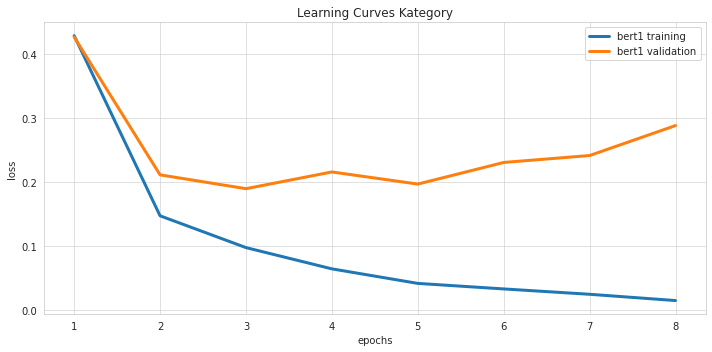

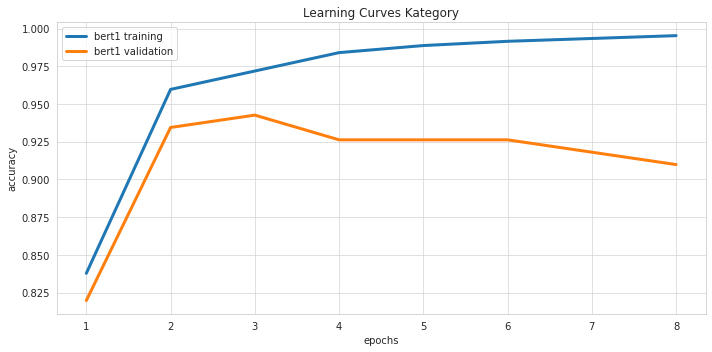

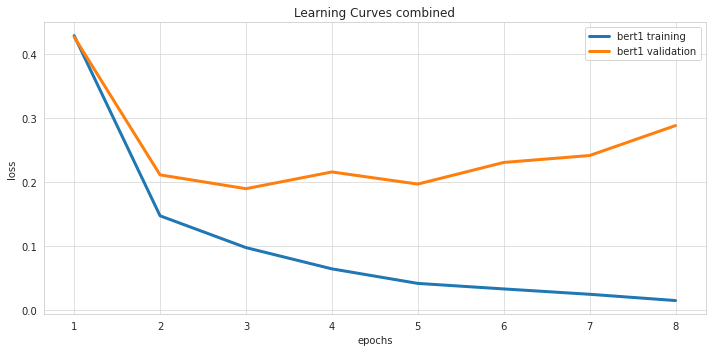

In [29]:
learning_curves(train_stats_bert1, output_feature_name='label', model_names='bert1')

In [30]:
predictions1, _ = bert1.predict(test1)

In [31]:
predictions1['Kategory_predictions'].value_counts()

False    306
True     227
Name: Kategory_predictions, dtype: int64

In [32]:
submission1 = pd.DataFrame({'id':test1.id,
                           'Категория':predictions1['Kategory_predictions'].values},
                          columns=['id', 'Категория'])
# возврат из бинарного
submission1.loc[(submission1['Категория']==0),'Категория']='Another'
submission1.loc[(submission1['Категория']==1),'Категория']=0
submission1.to_csv('submission1.csv', index=False, sep=',', encoding='utf-8')
submission1['Категория'].value_counts()

Another    306
0          227
Name: Категория, dtype: int64

In [33]:
# Второе отсечение - убираем из трейна предсказанные значение 0 
predictions, _ = bert1.predict(train1)
train1['Kategory']=predictions['Kategory_predictions'].values
train2=train1.loc[(train1['Категория']!=0)|(train1['Kategory']!=True)]
train2.to_csv('train2.csv', index=False, sep=',', encoding='utf-8')
train2['Категория'].value_counts()

8     158
16    146
4     124
10     53
3      46
7      37
1      25
11     25
13     15
6      15
5      14
15     11
0       9
9       8
14      7
2       5
12      2
Name: Категория, dtype: int64

In [34]:
# В усеченном трейне в целевой переменной оставляем значения 16,8,4 и Another
train2['Kategory']=train2['Категория']
train2.loc[(train2['Категория']!=16)&(train2['Категория']!=8)&(train2['Категория']!=4),"Kategory"]='Another'
train2['Kategory'].value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Another    272
8          158
16         146
4          124
Name: Kategory, dtype: int64

In [35]:
# Сразу сокращаем тест - убрав предсказанные 0
submission_krat=submission1.loc[submission1['Категория']=='Another']
test2= submission_krat.merge(test, how='left', on='id')
test2.to_csv('test2.csv', index=False, sep=',', encoding='utf-8')
test2['Категория'].value_counts()


Another    306
Name: Категория, dtype: int64

In [36]:
test2 = pd.read_csv('test2.csv')

In [37]:
train2 = train2.reset_index(drop=True)
train2

,Message text,Категория,Kategory
0,Aggressive dogs. On the rainbow there is a flo...,1,Another
1,A caustic and unhealthy smell from the quarrie...,16,16
2,There is no road lighting from the beginning o...,3,Another
3,Please put me and my family on the waiting lis...,6,Another
4,We are constantly cleaning the territory betwe...,16,16
...,...,...,...
695,Unsatisfactory quality of work of educators an...,7,Another
696,Support measures in the context of an unfavora...,6,Another
697,Denial of vaccination,4,4
698,Violation of the traffic schedule in the imple...,8,8


In [38]:
# Запускаем третью обработку 
config = {
    "input_features": [
        {
            "name": "Message text",
            "type": "text",
            'encoder': 'roberta',
            'trainable': True,        
        },

    ],
    "output_features": [
        {
            "name": "Kategory",
            "type": "category",
            "dropout": 0.2,
            "activation": 'tanh'
        }
    ],
        'training': {
        'batch_size': 4,
        'decay': True,       
        'trainable': True,
        'learning_rate': 0.0000055,
        'epochs': 10,
        'early_stop': 10,
        'validation_field': 'Kategory',
        'validation_metric': 'loss', 
        'learning_rate_warmap_epoch': 3,
        
    },
        'preprocessing':{
        'split_probabilities': [0.9, 0.1, 0.0],
        'stratify': 'Kategory'}
}

In [39]:
bert2 = LudwigModel(config, logging_level=50,)

In [40]:
%%time
print("Training Model...")
train_stats_bert2, _, _ = bert2.train(
    train2,   
    model_name='bert2',
    skip_save_processed_input=True,
    random_seed=28)

Training Model...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


CPU times: user 4min 39s, sys: 1min 14s, total: 5min 53s
Wall time: 7min


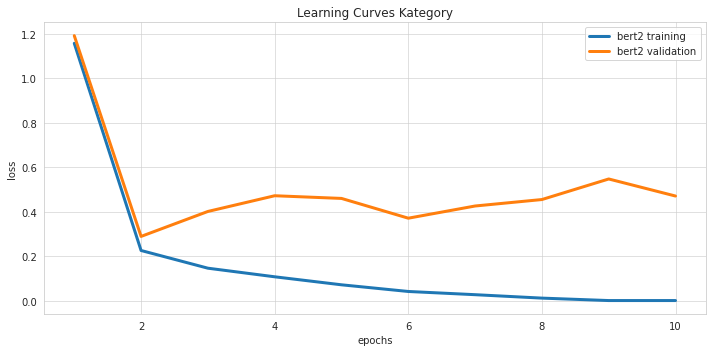

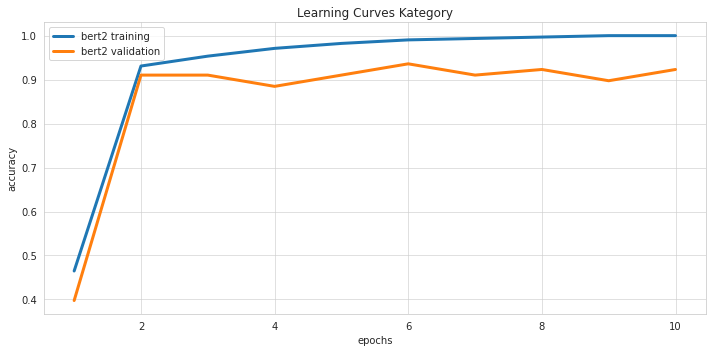

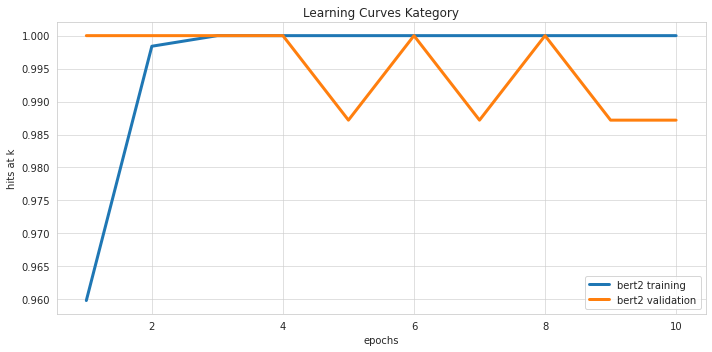

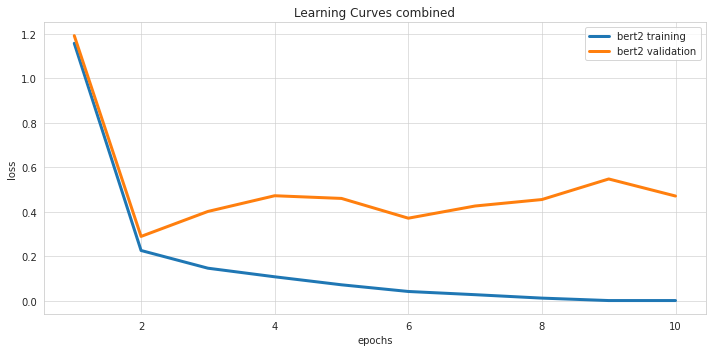

In [41]:
learning_curves(train_stats_bert2, output_feature_name='label', model_names='bert2')

In [42]:
predictions2, _ = bert2.predict(test2)

In [43]:
predictions2['Kategory_predictions'].value_counts()

Another    115
8           75
16          72
4           44
Name: Kategory_predictions, dtype: int64

In [44]:
submission2 = pd.DataFrame({'id':test2.id,
                           'Категория':predictions2['Kategory_predictions'].values},
                          columns=['id', 'Категория'])
submission2.to_csv('submission2.csv', index=False, sep=',', encoding='utf-8')
submission2['Категория'].value_counts()

Another    115
8           75
16          72
4           44
Name: Категория, dtype: int64

In [45]:
# Третье отсечение - убираем из трейна значения 16,8,4
train3=train2.loc[(train2['Категория']!=16)&(train2['Категория']!=8)&(train2['Категория']!=4)]
train3.to_csv('train3.csv', index=False, sep=',', encoding='utf-8')
train3['Категория'].value_counts()
# Оставлены все оставшиеся, обучение по полю Категория

10    53
3     46
7     37
1     25
11    25
6     15
13    15
5     14
15    11
0      9
9      8
14     7
2      5
12     2
Name: Категория, dtype: int64

In [46]:
train3['Kategory']=train3['Категория']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
# Сразу сокращаем тест - убрав предсказанные 16,8,4
submission_krat=submission2.loc[submission2['Категория']=='Another']
test3= submission_krat.merge(test, how='left', on='id')
test3.to_csv('test3.csv', index=False, sep=',', encoding='utf-8')
test3['Категория'].value_counts()

Another    115
Name: Категория, dtype: int64

In [48]:
train3 = train3.reset_index(drop=True)
train3

,Message text,Категория,Kategory
0,Aggressive dogs. On the rainbow there is a flo...,1,1
1,There is no road lighting from the beginning o...,3,3
2,Please put me and my family on the waiting lis...,6,6
3,I propose to check the quality of this bread a...,13,13
4,Good afternoon ! Applied in May 2021 for an in...,10,10
...,...,...,...
267,"Error displaying data about services, organiza...",2,2
268,Unsatisfactory condition of the adjacent schoo...,7,7
269,Violations of the procedure for awarding the t...,10,10
270,Unsatisfactory quality of work of educators an...,7,7


In [61]:
# Запускаем последнюю обработку (настройки подравнять дополнительно)
config = {
    "input_features": [
        {
            "name": "Message text",
            "type": "text",
            'encoder': 'bert',
         
        },

    ],
    "output_features": [
        {
            "name": 'Kategory',
            "type": "category",
        }
    ],
        'training': {
        'batch_size': 4,
        'decay': True,     
        'trainable': True,
        'learning_rate': 0.0000075,
        'epochs': 13,
        'early_stop': 13,
        'validation_field': 'Kategory',
        'validation_metric': 'loss',
        'learning_rate_warmap_epoch': 3,
        
    },
        'preprocessing':{
        'split_probabilities': [1.0, 0.0, 0.0],
        'stratify': 'Kategory'}
}

In [62]:
bert3 = LudwigModel(config, logging_level=50,)

In [63]:
%%time
print("Training Model...")
train_stats_bert3, _, _ = bert3.train(
    train3,   
    model_name='bert3',
    skip_save_processed_input=True,
    random_seed=34)

Training Model...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


CPU times: user 2min 45s, sys: 1min, total: 3min 45s
Wall time: 4min 33s


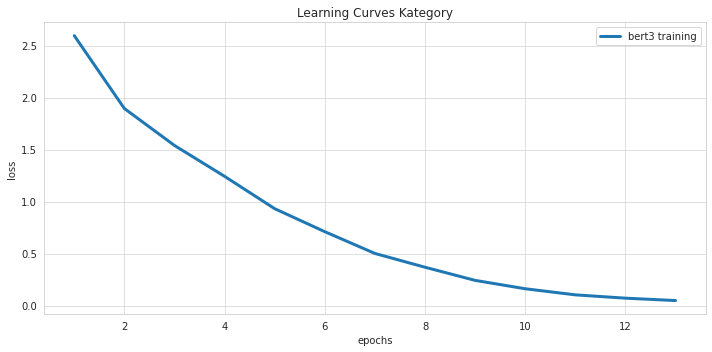

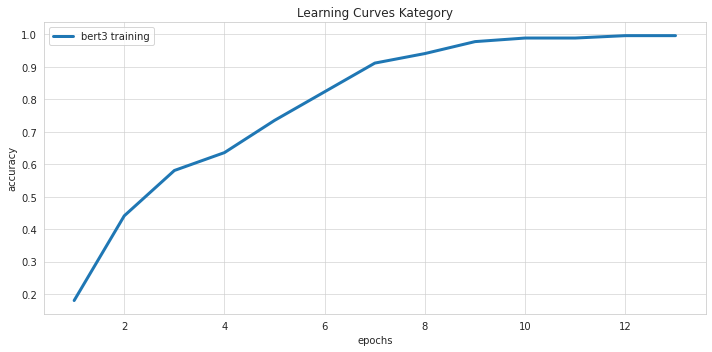

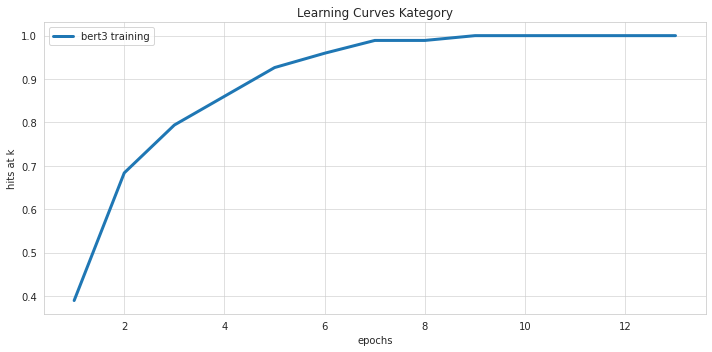

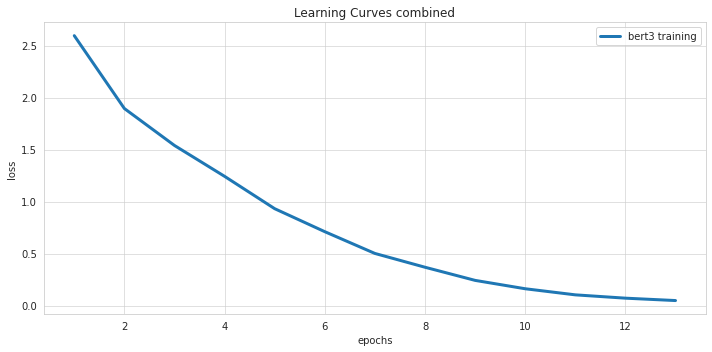

In [64]:
learning_curves(train_stats_bert3, output_feature_name='label', model_names='bert3')

In [65]:
predictions3, _ = bert3.predict(test3)

In [66]:
predictions3['Kategory_predictions'].value_counts()

10    31
7     19
3     17
1     14
5     12
13     6
11     6
6      3
15     2
9      2
0      1
14     1
2      1
Name: Kategory_predictions, dtype: int64

In [67]:
submission3 = pd.DataFrame({'id':test3.id,
                           'Категория':predictions3['Kategory_predictions'].values},
                          columns=['id', 'Категория'])
submission3.to_csv('submission3.csv', index=False, sep=',', encoding='utf-8')
submission3['Категория'].value_counts()

10    31
7     19
3     17
1     14
5     12
13     6
11     6
6      3
15     2
9      2
0      1
14     1
2      1
Name: Категория, dtype: int64

In [68]:
submission_start['Категория'].value_counts()

3    467
Name: Категория, dtype: int64

In [69]:
# Итак - получены предсказания
# submission_start - предсказания 3
# submission1 - предсказания 0 
# submission2 - предсказания 16,4,8
# submission3 - предсказания всех остальных
# объединяем
submission_start=submission_start.loc[submission_start['Категория']!='Another']
submission1=submission1.loc[submission1['Категория']!='Another']
submission2=submission2.loc[submission2['Категория']!='Another']
submission_all=pd.concat([submission_start,submission1,submission2,submission3],ignore_index=True)
submission_all['Категория'] = submission_all['Категория'].astype('string')
submission_all['Категория'].value_counts()

3     484
0     228
8      75
16     72
4      44
10     31
7      19
1      14
5      12
13      6
11      6
6       3
15      2
9       2
14      1
2       1
Name: Категория, dtype: Int64

In [70]:
# Объединяем с тестом по ID
submission_all= test.merge(submission_all, how='left', on='id')

In [71]:
submission_all=submission_all[['id','Категория']]

In [72]:
submission_all.to_csv('submission_all_robbert_3loss.csv', index=False, sep=',', encoding='utf-8')